<a href="https://colab.research.google.com/github/jtlee-97/Machine-Learning-with-Python/blob/main/ADALINE_%26_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pre-prepare.

In [1]:
# 사전준비 (import / 붓꽃데이터)
import os
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')

y = df.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values  

In [2]:
# Graph
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid( np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution) )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Adaline (Adaptive Linear Neuron)

- 단층 인공신경망인 **퍼셉트론 알고리즘을 향상**시킨 새로운 인공 신경망 알고리즘
- 단일층 신경망의 또 다른 종류인 적응형 선형 뉴런
- 회귀(Regression) / 로지스틴 회귀(Logistic Regression) / SVM(Support Vector Machine) 알고리즘의 토대를 마련한 알고리즘

      : 아달린은 연속함수로 비용함수를 정의하고 최소화하는 개념이다.
      : 결정함수를 통과하지 않은 값을 통해 가중치를 업데이트 한다.

      <퍼셉트론과의 차이점>
        - 퍼셉트론 : 진짜 클래스 레이블과 예측 클래스 레이블을 비교
        - 아달린 : 진짜 클래스 레이블과 선형 활성화 함수의 실수 출력 값을 비교해서 모델의 오차를 계산 및 가중치를 업데이트 한다.

In [3]:
Image(url='https://git.io/JtIbn', width=600) 

###**Gradient Descent** (경사하강법)

> 목적함수를 정리하고, 목적함수의 값이 최소(최적)이 되는 가중치를 찾아가는 과정

      <목적함수>
       비용함수 : 손실을 모아서 전체를 평균한 것
       손실함수 : Sample 하나에 대한 손실을 계산

      [하단의 그래프처럼 비용함수 J가 최소의 기울기를 가질 때를 목표로 한다]

####**Cost function J(w) formula.**


$J(w) = \frac{1}{2}\sum_{i}^{}(y^{i})-\hat{y}^{i})^{2}$
      

In [4]:
Image(url='https://git.io/JtIbc', width=500)

####**Weight update $\Delta w_{j}$ formula.**

$\Delta w_{j} = -\eta \frac{\partial J}{\partial w_{j}} = \eta \sum_{i}^{}(y^{i}-\varnothing (z^{i}))x_{j}^{(i)}$




####**Adaline learning rules**

$w := w+\Delta w$



---


# **Implement the Adaline & Gradient Descent using Python**

> Adaline code was slightly modified in perceptron code and an activation function was added.

In [5]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input) #In Adaline, the activation function does not have any special features, so if "output = net_input" is used, the syntax may be omitted.
            errors = (y - output) 

            # 가중치변화량 = [학습률]* Σ(오차율*X)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
        
            # 비용함수 =  (1/2)* Σ(오차율)^2
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost) 
        return self


    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # activation Funtion   
    def activation(self, X): 
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

> *코드 부가 설명*

      X.T : X 행렬의 전치행렬
      이유 : X.T와 errors를 dot(넘파이배열끼리의 곱)을 할 때, X의 행의 숫자와 Y의 열의 숫자가 동일해야 한다. 
      즉, X행렬의 행(샘플)과 열(특성)을 바꿔야 errors(가중치)와 곱셈이 가능해진다.



---


# **Check learning through training data.**

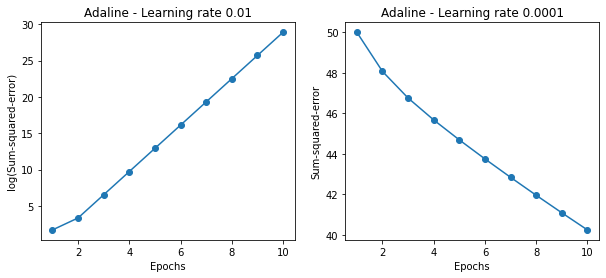

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 

# Smaple No.1 : 10회 실시 / 학습률 0.01
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)                                                                                                                            
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o') #손실값이 너무 커서 log를 추가한 것임
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

# Smaple No.2 : 10회 실시 / 학습률 0.0001 
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

> *코드 부가 설명*

- subplots : 한번에 여러 그래프를 보여주는 함수

- subplot을 사용하면 하나하나 설정해줘야하지만 subplots는 한번에 설정 가능하다.

- fig, ax = plt.subplots() 이런 형태의 모습으로 자주 사용하는데, fig는 figure로 전체 subplot을 말한다. (전체사이즈를 의미)
      
- ax는 axe로 전체 중 낱낱개를 말한다. (내부 각각의 그래프를 의미)

- 여기서 작성한 코드를 기반으로 해석해보면 행 1 / 열 2로 총 2개의 그래프를 가지는 10,4 size의 figure생성을 의미

# 결과 확인

      [ 학습률 = 0.01  ]
        너무 큰 학습률이라 늘어나는 그래프가 보이며 (발산하는 모습), 최솟값을 지나쳤다.

      [ 학습률 = 0.0001 ]
        비용이 작아지는 그래프를 보이지만 학습률이 너무 작아서 전역 최솟값에 수렴하려면 아주 많은 Epochs를 필요로 한다.


In [7]:
Image(url='https://git.io/JtIb4', width=700) 

> 학습률(eta)을 잘 정해야 하는 이유

        학습률을 잘 정하면 미세 조정을 통해 점차 줄여나가 최소로 수렴해가는 것을 볼 수 있다.
        하지만 학습률을 너무 크게 잡으면, eta=0.01의 결과와 같이 발산한다.
        이는 상단 우측그림처럼 계속 발산하면서 학습을 진행할 수록 오차값이 더 커지는 그래프가 만들어지게 되기 때문이다.


        W를 모델 파라미터라 부르고 학습률을 하이퍼 파라미터라 부르는데, 학습률을 잘 지정하는 것이 정말 중요하다. 
        이는 여러 시행착오를 통해 찾아가며 중요환 머신러닝의 과정이다.

> **결론**
        
        Learning Rate를 매우 작게 해야 J(w)값이 작아지고 우리가 원하는 결과를 얻을 수 있을 것



---

# **Adjusting the scale of the characteristics to improve the result of the gradient descent method.**






> 비용함수의 최저점을 찾기위한 방법 중 하나 : 특성의 스케일을 조정하는 것


**<특성 X를 표준화하는 특성 스케일 공식>** 

$X' = X - \frac{u}{\sigma}$

  

- X' : 표준화 값
- X  : 특성
- $u$ : 모든 샘플의 평균
- $\sigma$ : 표준편차


In [8]:
# 특성을 표준화합니다.
X_std = np.copy(X) 
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std() #모든 샘플의 첫번째 열 표준화 작업
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std() #모든 샘플의 두번째 열 표준화 작업



---

# **Check the result using the standardized value X_std.  (eta=0.01)**

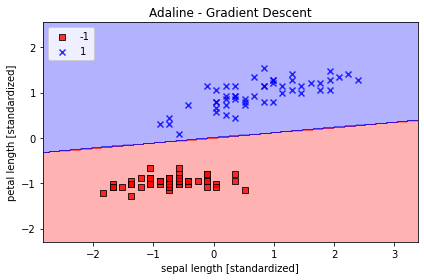

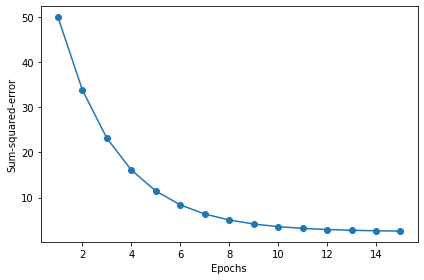

In [9]:
ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd) 
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

___
#**Large-scale machine learning and stochastic gradient descent (SGD).**

      모든 샘플을 이용한 경사하강법은 대규모 머신러닝에서 가중치 업데이트에 드는 연산이 너무 많다.

      확률적 경사하강법(SGD) : 전체 샘플을 다루는 배치 경사 하강법의 대안으로 각 훈련 샘플에 대해 조금씩 가중치를 업데이트 하는 방식.

      <특징>
        (1) 학습 중간 과정에서의 결과의 진폭이 크고 불안정
        (2) 속도가 매우 빠름
        (3) 데이터를 하나씩 처리하여 오차율이 큼
        (4) GPU의 성능을 모두 활용하지 못함
        (5) 훈련 중 학습률 변경이 불가능

      <좋은 훈련 방법>
        > 훈련 샘플 순서를 무작위로 주입하는 것이 중요.
        > 순환되지 않도록 에포크마다 훈련 데이터셋을 섞어주는 것이 좋음.

### **[ 배치 경사하강법과 확률적 경사하강법 공식 비교 ]**

> 배치 경사하강법 : 
$\Delta w = \eta \sum_{i}^{}(y^{i}-\phi (z^{i}))x^{(i)}$

> 확률 경사하강법 : 
$\Delta w = \eta (y^{(i)}-\phi (z^{(i)}))x^{(i)}$


      배치 경사하강법 : 모든 샘플에 대해 가중치를 업데이트
      확률 경사하강법 : 샘플을 뽑아 조금씩 가중치를 업데이트


In [10]:
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb8RUdK%2FbtqAm4Utey2%2F5DfjTQw70XKYgtOB8VHpeK%2Fimg.png', width=700) 

In [17]:
# 확률적 경사하강법이 적용된 아달린 코드

class AdalineSGD(object):
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle # 샘플 셔플 여부 (기본값:True)
        self.random_state = random_state
        
    """랜덤한 값(무작위성)을 통해 탐험적인 결과를 이끌어냄"""    
    def fit(self, X, y):
        self._initialize_weights(X.shape[1]) # 가중치 초기화
        self.cost_ = []
        for i in range(self.n_iter):  
            if self.shuffle:                 # shuffle이 true라면 X,y를 무작위로 섞음
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):    # 랜덤으로 샘플을 하나 뽑아 수행
                cost.append(self._update_weights(xi, target)) # update_weights
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    # Partial_fit 매소드 : 이미 훈련된 가중치를 다시 초기화하지 않고 그대로 이어서 훈련 데이터를 학습
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

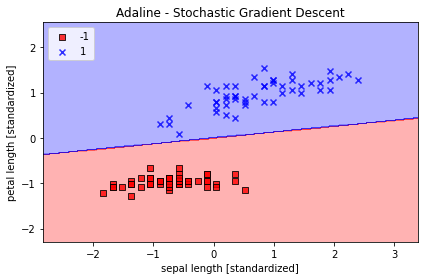

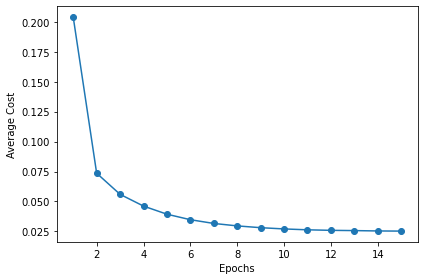

In [19]:
# 학습률 : 0.01 / 애포크 : 15회
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

- 확률적 경사하강법의 COST 그래프는 빠르지만 가파르게 그려지는 것을 확인할 수 있다. 

- Data Set이 크거나 매개변수 특성이 많은 경우는 더욱 요동치는 그래프가 그려진다

---
#### 확률적 경사하강법의 단점 보완



      <대안>
        배치 경사하강법 > "미니배치 경사하강법" > 확률적 경사하강법

        미니배치 경사하강법 : 배치와 확률적 경사하강법의 절충안
                            : 신경망 알고리즘에선 거의 미니배치 경사하강법을 사용

In [11]:
Image(url='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FSRACX%2FbtqAkxQ8pkf%2FclRtX6wjdmVfpU9Z9V1rB1%2Fimg.png', width=700) 